### 퍼셉트론: 다수의 신호를 입력으로 받아 하나의 신호로 출력

In [146]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

import warnings
warnings.filterwarnings(action='ignore') 

# and , or , nand 함수 구현

In [147]:




def AND(x1,x2):
    x=np.array([x1,x2])
    w=np.array([0.5,0.5])
    b=-0.7
    tmp=np.sum(w*x)+b
    if tmp<=0:
        return 0
    else:
        return 1


print(AND(0,0))



0


In [148]:
def NAND(x1,x2):
    x=np.array([x1,x2])
    w=np.array([-0.5,-0.5])
    b=0.7
    tmp=np.sum(w*x)+b
    if tmp<=0:
        return 0
    else:
        return 1


print(NAND(1,1))



0


In [149]:
def OR(x1,x2):
    x=np.array([x1,x2])
    w=np.array([0.5,0.5])
    b=-0.2
    tmp=np.sum(w*x)+b
    if tmp<=0:
        return 0
    else:
        return 1


print(OR(0,1))



1


# 퍼셉트론 시각화

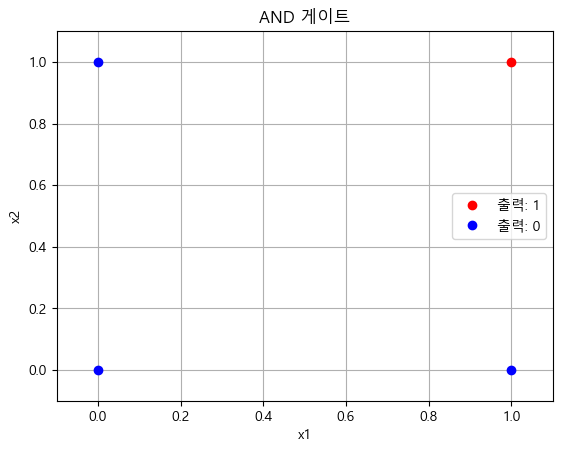

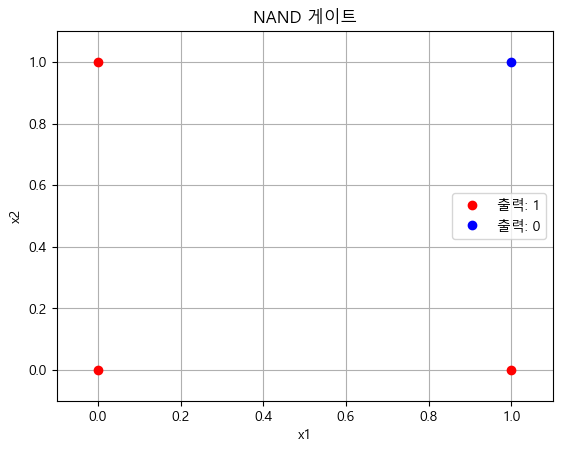

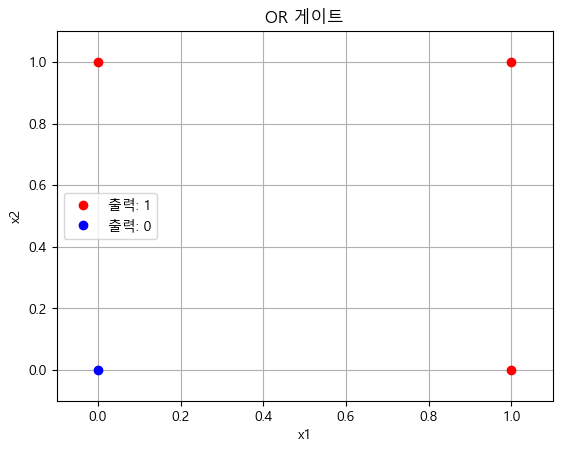

In [150]:
import numpy as np
import matplotlib.pyplot as plt

def plot_perceptron_gate(w1, w2, b, title):
    # 그림과 축 정의
    fig, ax = plt.subplots()
    
    # 결정 경계 그리기
    x = np.linspace(-0.1, 1.1, 200)
    y = (b - w1 * x) / w2
    
    # 입력 포인트 그리기
    points = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    labels = (w1 * points[:, 0] + w2 * points[:, 1] + b > 0).astype(int)
    
    output_1_points = []
    output_0_points = []
    for point, label in zip(points, labels):
        if label:
            output_1_points.append(point)
        else:
            output_0_points.append(point)
    
    output_1_points = np.array(output_1_points)
    output_0_points = np.array(output_0_points)
    
    if len(output_1_points) > 0:
        ax.plot(output_1_points[:, 0], output_1_points[:, 1], 'ro', label='출력: 1')
    if len(output_0_points) > 0:
        ax.plot(output_0_points[:, 0], output_0_points[:, 1], 'bo', label='출력: 0')
    
    # 축 한계 설정
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 1.1)
    
    # 그리드, 레이블 및 제목 추가
    ax.grid(True)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_title(title)
    
    # 범례 표시
    ax.legend()
    
    plt.show()

# AND 게이트
plot_perceptron_gate(1, 1, -1.5, 'AND 게이트')

# NAND 게이트
plot_perceptron_gate(-1, -1, 1.5, 'NAND 게이트')

# OR 게이트
plot_perceptron_gate(1, 1, -0.5, 'OR 게이트')


# 계단 함수 구현

In [151]:
x=np.array([-1.0,1.0,2.0])
x
y=x>0
y

y= y.astype(int) 
y

array([0, 1, 1])

# 계단 함수의 그래프

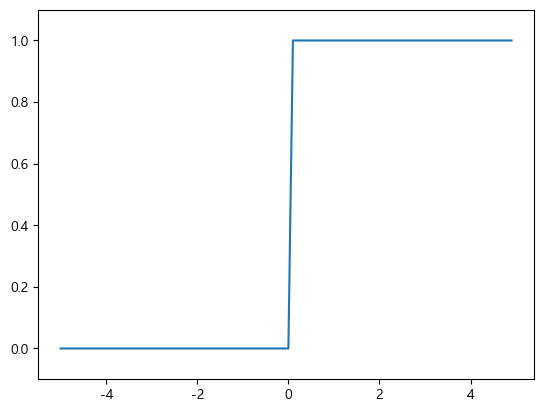

In [152]:
def step_function(x):
    return np.array(x>0,dtype=int)
x=np.arange(-5.0,5.0,0.1)
y=step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)  # 보여질 y축 범위 지정
plt.show()

# 시그모이드 함수

In [153]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [154]:
x=np.array([-1.0,1.0,2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

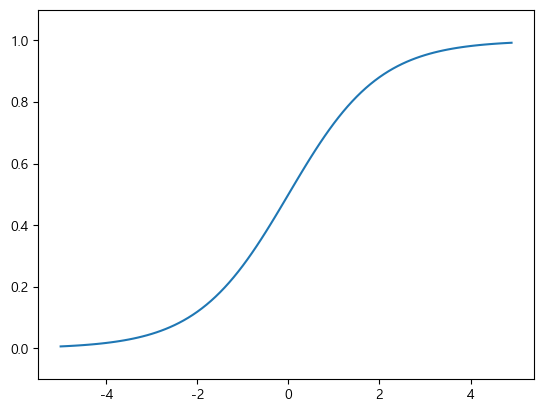

In [155]:

x=np.arange(-5.0,5.0,0.1)
y=sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)  # 보여질 y축 범위 지정
plt.show()


# Relu함수: 0이하면 0을 출력, 0을 넘으면 입력값을 그대로출력

In [156]:
def relu(x):
    return np.maximum(0,x)
relu(-2)

0

# 시그모이드 VS ReLU
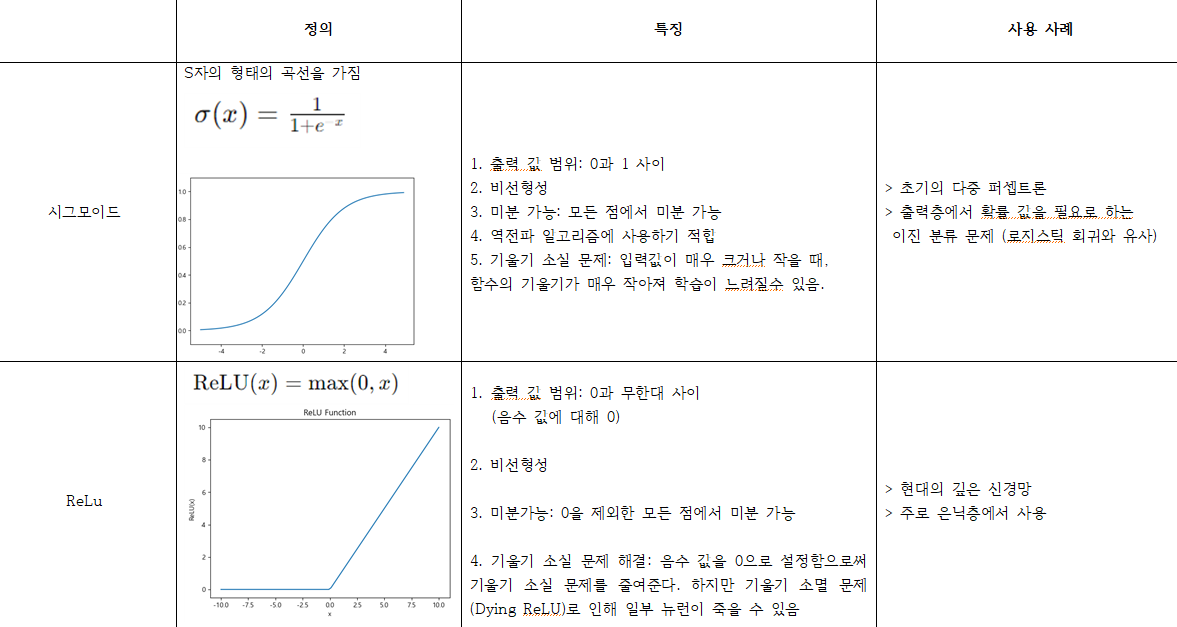

> ReLU는 현대의 딥러닝 모델에서 널리 사용되며, 특히 은닉층에서 중요한 역할을 함 <BR>
  학습 속도와 성능 면에서 많은 이점을 제공하기 때문에 대부분의 딥러닝 아키텍처에서 표준으로 채택됨<BR><BR>

> 시그모이드는 주로 <span style="color:red">출력층에서</span> 사용되며, 이진 분류 문제에서 출력 값을 확률로 해석할 수 있는 경우에 유용<br>
  기울기 소실 문제로 인해 깊은 신경망에서는 잘 사용되지 않음

5/20 스터디


# 다차원 배열 계산
>  1. 다차원의 배열도 그 기본은 숫자의 집합
>  2. 각 차원의 크기는 동일해야함 -> ([[1,2,3][2,3]])은 불가

In [157]:
import numpy as np

# 1차원 배열
A=np.array([1,2,3,4])
print(A)
np.ndim(A) # 차원수 출력
A.shape  # 배열의 형태 - 튜플을 반환
A.shape[0] # 첫번째 차원의 크기


[1 2 3 4]


4

In [158]:
B=np.array([[1,2],[3,4],[5,6]])
print(B)

np.ndim(B)
B.shape #(3,2)
print(B.shape[0],"행",B.shape[1],"열")

[[1 2]
 [3 4]
 [5 6]]
3 행 2 열


# 행렬의 곱
> 2차원 배열의 곱<br><br>
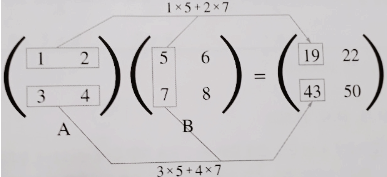

In [159]:
# 2차원 배열의 곱을 나타낸 파이썬 코드
A=np.array([[1,2],[3,4]])
B=np.array([[5,6],[7,8]])

np.dot(A,B)

array([[19, 22],
       [43, 50]])

### A의 행X열  => <span style="color:green"> Y</span> x <span style="color:red"> Z</span>
### B의 행X열 =>  <span style="color:red">Z</span> x <span style="color:blue"> W</span>
### 즉 <span style="color:red"> (A 열의 수= B 행의 수)</span>가 만족해야 내적이 가능
### A X B = C 일때 C는 <span style="color:green"> Y</span> x <span style="color:blue"> W</span>형태



In [160]:

C=np.array([[1,2],[3,4],[5,6]])  # 3,2
D=np.array([[1,2,3],[4,5,6]])   # 2, 3

# np.dot(C,D)  # 3,3


### 신경망에서의 행렬곱
 > 편향과 활성화 함수를 생략하고 가중치만 갖는 신경망에 대한 그림 <br>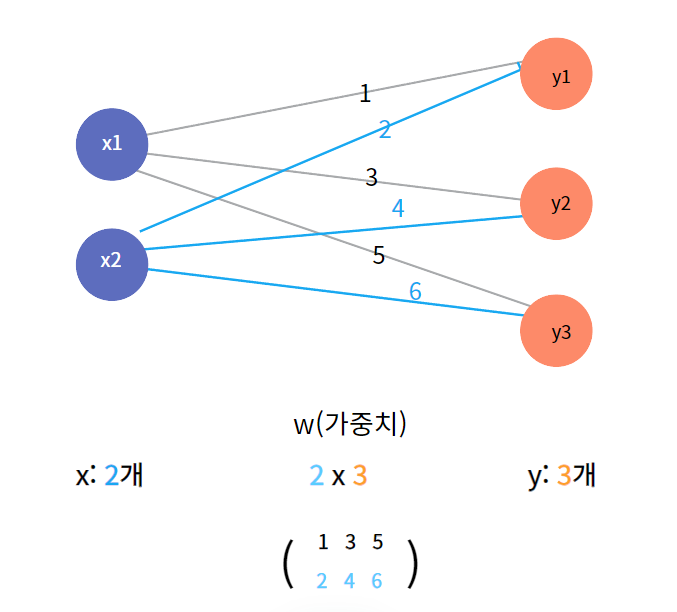


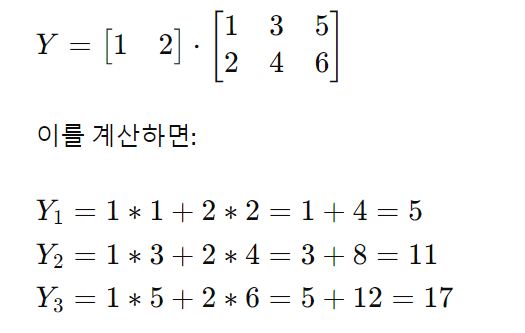

In [161]:
X= np.array([1,2])
X.shape
print(X)
W=np.array([[1,3,5],[2,4,6]])

Y=np.dot(X,W)
print(Y)


[1,2,]

[1 2]
[ 5 11 17]


[1, 2]

# 3층 신경망 구현하기

### 퍼셉트론: 다수의 신호를 입력으로 받아 하나의 신호로 출력

In [162]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

import warnings
warnings.filterwarnings(action='ignore') 

# and , or , nand 함수 구현

In [163]:




def AND(x1,x2):
    x=np.array([x1,x2])
    w=np.array([0.5,0.5])
    b=-0.7
    tmp=np.sum(w*x)+b
    if tmp<=0:
        return 0
    else:
        return 1


print(AND(0,0))



0


In [164]:
def NAND(x1,x2):
    x=np.array([x1,x2])
    w=np.array([-0.5,-0.5])
    b=0.7
    tmp=np.sum(w*x)+b
    if tmp<=0:
        return 0
    else:
        return 1


print(NAND(1,1))



0


In [165]:
def OR(x1,x2):
    x=np.array([x1,x2])
    w=np.array([0.5,0.5])
    b=-0.2
    tmp=np.sum(w*x)+b
    if tmp<=0:
        return 0
    else:
        return 1


print(OR(0,1))



1


# 퍼셉트론 시각화

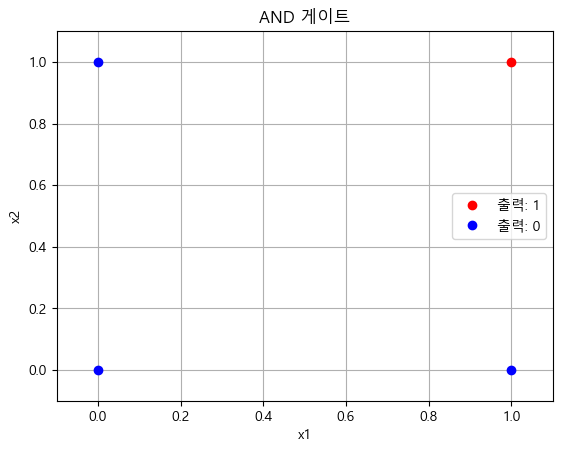

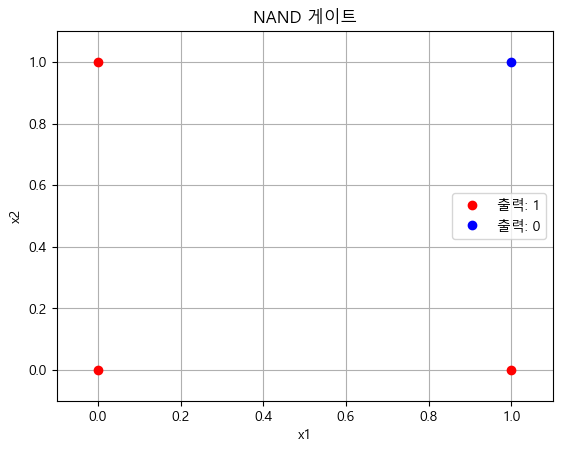

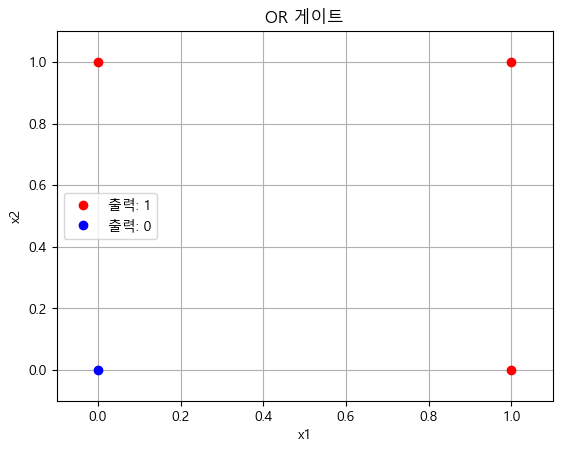

In [166]:
import numpy as np
import matplotlib.pyplot as plt

def plot_perceptron_gate(w1, w2, b, title):
    # 그림과 축 정의
    fig, ax = plt.subplots()
    
    # 결정 경계 그리기
    x = np.linspace(-0.1, 1.1, 200)
    y = (b - w1 * x) / w2
    
    # 입력 포인트 그리기
    points = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    labels = (w1 * points[:, 0] + w2 * points[:, 1] + b > 0).astype(int)
    
    output_1_points = []
    output_0_points = []
    for point, label in zip(points, labels):
        if label:
            output_1_points.append(point)
        else:
            output_0_points.append(point)
    
    output_1_points = np.array(output_1_points)
    output_0_points = np.array(output_0_points)
    
    if len(output_1_points) > 0:
        ax.plot(output_1_points[:, 0], output_1_points[:, 1], 'ro', label='출력: 1')
    if len(output_0_points) > 0:
        ax.plot(output_0_points[:, 0], output_0_points[:, 1], 'bo', label='출력: 0')
    
    # 축 한계 설정
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 1.1)
    
    # 그리드, 레이블 및 제목 추가
    ax.grid(True)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_title(title)
    
    # 범례 표시
    ax.legend()
    
    plt.show()

# AND 게이트
plot_perceptron_gate(1, 1, -1.5, 'AND 게이트')

# NAND 게이트
plot_perceptron_gate(-1, -1, 1.5, 'NAND 게이트')

# OR 게이트
plot_perceptron_gate(1, 1, -0.5, 'OR 게이트')


# 계단 함수 구현

In [167]:
x=np.array([-1.0,1.0,2.0])
x
y=x>0
y

y= y.astype(int) 
y

array([0, 1, 1])

# 계단 함수의 그래프

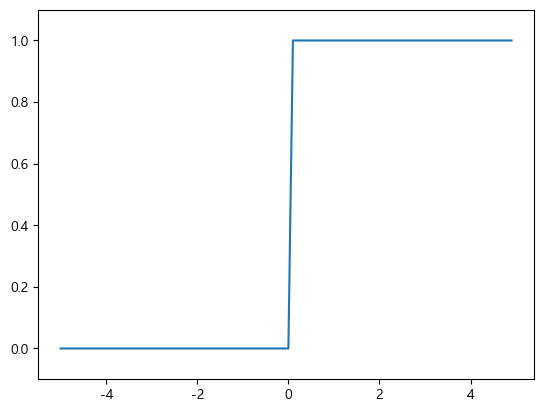

In [168]:
def step_function(x):
    return np.array(x>0,dtype=int)
x=np.arange(-5.0,5.0,0.1)
y=step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)  # 보여질 y축 범위 지정
plt.show()

# 시그모이드 함수

In [169]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [170]:
x=np.array([-1.0,1.0,2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

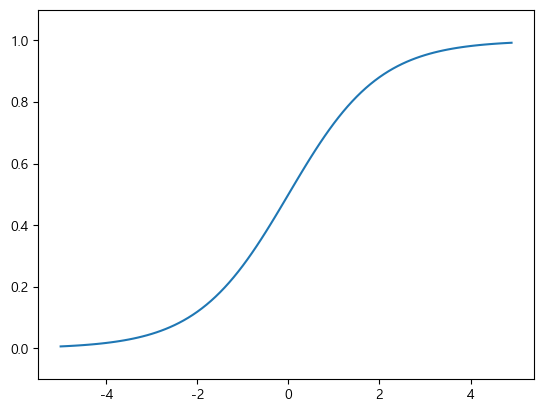

In [171]:

x=np.arange(-5.0,5.0,0.1)
y=sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)  # 보여질 y축 범위 지정
plt.show()


# Relu함수: 0이하면 0을 출력, 0을 넘으면 입력값을 그대로출력

In [172]:
def relu(x):
    return np.maximum(0,x)
relu(-2)

0

# 시그모이드 VS ReLU
![image.png](attachment:image.png)

> ReLU는 현대의 딥러닝 모델에서 널리 사용되며, 특히 은닉층에서 중요한 역할을 함 <BR>
  학습 속도와 성능 면에서 많은 이점을 제공하기 때문에 대부분의 딥러닝 아키텍처에서 표준으로 채택됨<BR><BR>

> 시그모이드는 주로 <span style="color:red">출력층에서</span> 사용되며, 이진 분류 문제에서 출력 값을 확률로 해석할 수 있는 경우에 유용<br>
  기울기 소실 문제로 인해 깊은 신경망에서는 잘 사용되지 않음

5/20 스터디


# 다차원 배열 계산
>  1. 다차원의 배열도 그 기본은 숫자의 집합
>  2. 각 차원의 크기는 동일해야함 -> ([[1,2,3][2,3]])은 불가

In [173]:
import numpy as np

# 1차원 배열
A=np.array([1,2,3,4])
print(A)
np.ndim(A) # 차원수 출력
A.shape  # 배열의 형태 - 튜플을 반환
A.shape[0] # 첫번째 차원의 크기


[1 2 3 4]


4

### 행렬의 곱에서는 대응하는 차원의 원소수를 일치시켜야 함

In [174]:

# A X B = C 에서
# A  = W x Z
# B=  Z x Q  형태라고 하면
# A의 열의 수와 B의 행의수는 같아야 하고
# 두 내적의 곱인 C는 W x Q 형태가 된다

In [175]:
A=np.array([[1,2,3],[4,5,6]])  # 2 X 3
B=np.array([[1,2],[3,4],[5,6]])  # 3 X 2
np.dot(A,B)  # 2 X 2



array([[22, 28],
       [49, 64]])

### 신경망에서의 행렬 곱
> 편향, 활성화 함수를 제외한  가중치 만으로 표현한 신경망 계산 <BR>
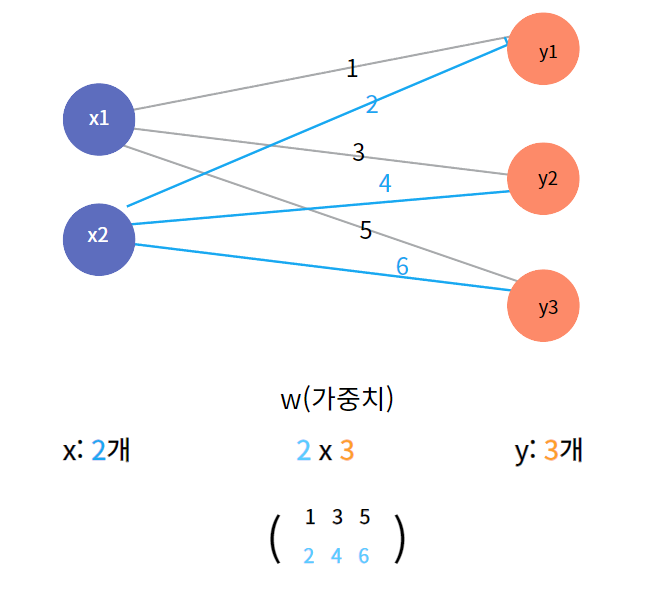

# 3층 신경망 구현하기

### 표기법
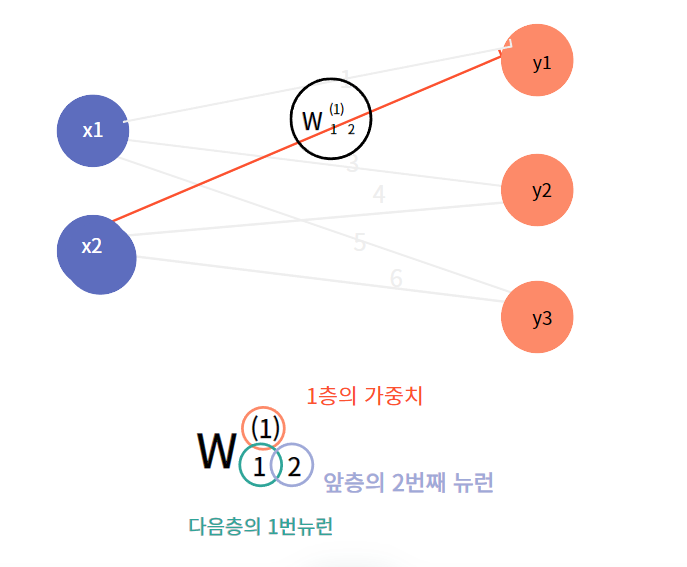

## 각 층의 신호 전달 구현하기

----------------------------------
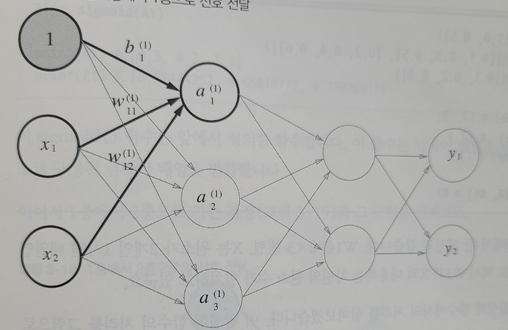 <br>
$ a_1^{(1)} = w_{11}^{(1)}x_1 +  w_{12}^{(1)}x_2 + b_1^{(1)}  $

----------------------------------


###  행렬의 곱을 이용하면 1층의 '가중치 부분'을 다음 식처럼 간소화 가능
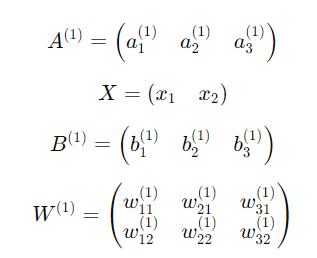
일때 <br>
$ A^{(1)} = XW^{(1)} + B^{(1)} $


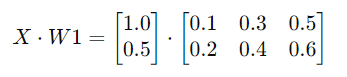

In [176]:
X= np.array([1.0,0.5])
W1= np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1= np.array([0.1,0.2,0.3])


print(W1.shape) #(2,3)
print(X.shape) #(2,)
print(B1.shape) #(3,)

# 1층으로 가는과정
A1= np.dot(X,W1)+B1 # 각 뉴런에 도달하는 입력의 총합
Z1= sigmoid(A1) # 각 A에 활성화 함수를 적용 ( 여기같은 경우는 sigmoid 적용 )
print(A1)
print(Z1)


(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


# 1층에서 2층으로 가는 과정

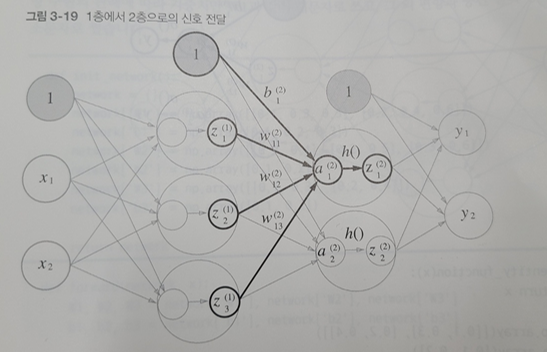

# 2층 신호 전달

In [177]:
#  2층 신호 전달
W2= np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2=np.array([0.1,0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)
 
A2=np.dot(Z1,W2)+B2
Z2=sigmoid(A2)


(3,)
(3, 2)
(2,)


# 마지막 출력층으로 신호전달

In [178]:
# 항등함수 : 입력 신호를 변환하지 않고 그대로 출력-> 주로 회귀 문제나 특정 유형의 출력층에서 사용
def identity_function(x):
    return X
W3= np.array([[0.1,0.3],[0.2,0.4]])
B3=np.array([0.1,0.2])

A3= np.dot(Z2,W3) + B3
Y= identity_function(A3)
Y

array([1. , 0.5])

# 출력층 설계하기
> 1. 신경망은 분류와 회귀 모두에 이용가능 <br>
> 2. 어떤 문제냐에 따라 출력층에서 사용하는 활성화 함수가 달라짐 <br>
> 3. 일반적으로 <span style="color:red">회귀에는 항등함수</span>를 | <span style="color:red">분류에는 소프트맥스 함수</span>를 사용함<br>

# 항등 함수와 소프트 맥스 함수 구현하기

> 항등함수: 입력 그대로 출력하기 때문에 출력층에서 입력신호와 똑같이 출력하려면 사용<br><br>
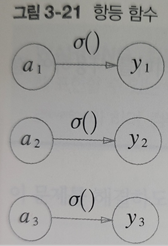

## 분류에서 사용하는 <span style="color:red">소프트맥스 함수</span>

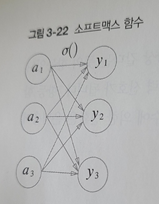 <br> 


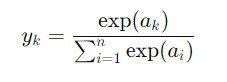
> * 분자 : 입력신호 $a_k$의 지수함수
> * 분모 : 모든 입력신호의 지수함수의 합


> * exp(x) = $ e^x $ <br><br>
> * n은 출력층의 뉴런수 <br><br>
> * $ y_k $는 그중 k번째 출력

In [179]:
# 소프트 맥스 함수 구현

a= np.array([0.3,2.9,4.0])
exp_a =np.exp(a) # 지수함수

sum_exp_a = np.sum(exp_a)

y=exp_a/sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [180]:
# (재사용을 위한)소프트 맥스 함수  선언
def softmax(a):
    exp_a=np.exp(a)
    sum_exp_a=np.sum(exp_a)
    y=exp_a/sum_exp_a
    return y

# 소프트 맥스 함수 구현시 주의점
> 1. 오버플로우 문제: 지수함수를 사용한다는것은 아주 쉽게 큰 값을 내뱉는다는 문제가 존재 <br>
> 2. 큰 값끼리의 나눗셈은 불안정한 수치를 내뱉음


# 소프트 맥스의 개선한 수식
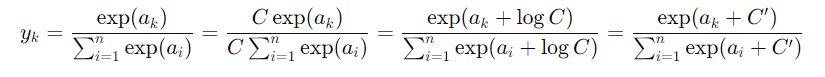
> 1. C라는 임의의 정수를 분자와 분모양쪽에 곱함
> 2. C를 지수함수 exp()안으로 옮겨 logC로 만듬
> 3. logC를 C'라는 새로운 기호로 바꿈 <BR>
* <SPAN STYLE="COLOR:RED">오버플로를 막을 목적이므로 C'에는 입력신호중 최댓값을 이용하는것이 일반적</SPAN>

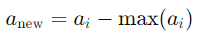<br>
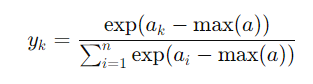

In [181]:
a=np.array([1010,1000,990])
np.exp(a)/ np.sum(np.exp(a)) # 소프트 맥수 함수 결과가 너무커서 nan으로 뜸



np.exp(a) 
c=np.max(a) # 최댓값: 1010
a-c  # array([  0, -10, -20])

np.exp(a-c)/np.sum(np.exp(a-c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [182]:
# (재사용을 위한)소프트 맥스 함수  선언 - 오버플로우 방지 버전
def softmax(a):
    c=np.max(a)
    exp_a=np.exp(a-c)
    sum_exp_a=np.sum(exp_a)
    y=exp_a/sum_exp_a
    return y

# 소프트맥스 함수의 특징
* 소프트맥수 함수의 출력은 0에서 1.0 사이의 실수
* 덕분에 함수의 출력을 확률로 해석가능

In [183]:
# 소프트맥스 함수의 특징
a= np.array([0.3,2.9,4.0])
y=softmax(a)
print(y)
np.sum(y)

[0.01821127 0.24519181 0.73659691]


1.0

# 손글씨 숫자 인식

In [184]:
import numpy as np
import os

def load_mnist(flatten=False, normalize=True):
    files = ['./train-images.idx3-ubyte', './train-labels.idx1-ubyte',
             './t10k-images.idx3-ubyte', './t10k-labels.idx1-ubyte']
    
    # Check if files exist
    for file in files:
        if not os.path.exists(file):
            raise FileNotFoundError(f'{file} not found in the current directory.')

    def load_images(file_name):
        with open(file_name, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
        if flatten:
            data = data.reshape(-1, 784)
        else:
            data = data.reshape(-1, 28, 28)
        if normalize:
            data = data / 255.0
        return data

    def load_labels(file_name):
        with open(file_name, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=8)
        return data

    # Load data
    x_train = load_images('./train-images.idx3-ubyte')
    t_train = load_labels('./train-labels.idx1-ubyte')
    x_test = load_images('./t10k-images.idx3-ubyte')
    t_test = load_labels('./t10k-labels.idx1-ubyte')

    return (x_train, t_train), (x_test, t_test)


# [ load_mnist ]
# # normalize: 입력 이미지의 픽셀 값을 0.0~ 1.0사이의 값으로 정규화 할지 정함=> False인 경우 입력 이미지의 픽셀은 원래값 그대로 0~255사이 값 유지
# # flatten: 입력 이미지를 1차원 배열로 만들지를 정함
# # one_hot_label: 원핫 인코딩 형태로 저장할지 정함(정답인 원소만 1, 나머지는 0인 배열)
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)


(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [185]:
import sys,os
sys.path.append(os.pardir)
import numpy as np
from PIL import Image

# 넘파이로 저장된 이미지 데이터를 PIL용 데이터 객체로 변환해야 함
def img_show(img):
    pil_img=Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)

img= x_train[0]
label= t_train[0]
print(label) #5import numpy as np
import os

def load_mnist(flatten=False, normalize=True):
    files = ['./train-images.idx3-ubyte', './train-labels.idx1-ubyte',
             './t10k-images.idx3-ubyte', './t10k-labels.idx1-ubyte']
    
    # Check if files exist
    for file in files:
        if not os.path.exists(file):
            raise FileNotFoundError(f'{file} not found in the current directory.')

    def load_images(file_name):
        with open(file_name, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
        if flatten:
            data = data.reshape(-1, 784)
        else:
            data = data.reshape(-1, 28, 28)
        if normalize:
            data = data / 255.0
        return data

    def load_labels(file_name):
        with open(file_name, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=8)
        return data

    # Load data
    x_train = load_images('./train-images.idx3-ubyte')
    t_train = load_labels('./train-labels.idx1-ubyte')
    x_test = load_images('./t10k-images.idx3-ubyte')
    t_test = load_labels('./t10k-labels.idx1-ubyte')

    return (x_train, t_train), (x_test, t_test)


# [ load_mnist ]
# # normalize: 입력 이미지의 픽셀 값을 0.0~ 1.0사이의 값으로 정규화 할지 정함=> False인 경우 입력 이미지의 픽셀은 원래값 그대로 0~255사이 값 유지
# # flatten: 입력 이미지를 1차원 배열로 만들지를 정함
# # one_hot_label: 원핫 인코딩 형태로 저장할지 정함(정답인 원소만 1, 나머지는 0인 배열)
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)


print(img.shape) #(784,)
img= img.reshape(28,28)  # 28 x 28 = 784
 
print(img.shape) #(28,28)
img_show(img)

5
(60000, 784)
(60000,)
(10000, 784)
(10000,)
(784,)
(28, 28)


# 신경망의 추론 처리

In [186]:
# 입력층 뉴런 784개 > 이미지 크기가 28 * 28 이기 때문

In [187]:
# 출력 뉴런 10개  > 0에서 9까지를 구별하는 문제이기 때문


In [188]:
# 첫번째 은닉층: 50개의 뉴런,  두번째 은닉층: 100개의 뉴런을 배치

In [191]:
def get_data():
    (x_train,t_train),(x_test,t_test)=\
    load_mnist(normalize=True, flatten=True)
    return x_test,t_test

# pickle 파일인 sample_weight.pkl에 저장된 '학습된 가중치 매개변수'를 읽음
    # => 이 파일에는 가중치와 편향 매개변수가 딕셔너리 변수로 저장되있음
def init_network():
    with open("sample_weight.pkl","rb")as f:
        network=pickle.load(f)  # pickle: 특정 객체를 파일로 저장하는 기능
    
    return network


def predict(network,x):
    W1,W2,W3=network['W1'],network['W2'],network['W3']
    b1,b2,b3=network['b1'],network['b2'],network['b3']

    a1= np.dot(x,W1)+b1
    z1=sigmoid(a1)

    a2= np.dot(z1,W2)+b2
    z2=sigmoid(a2)

    a3= np.dot(z2,W3)+b3
    y=softmax(a3)
    return y

    


### 정규화: 데이터에 특정 변환을 가하는것
### 전처리: 입력이미지 데이터에 대한 전처리 작업

In [197]:
# 1. MNIST데이터셋을 얻고 네트워크를 생성


# x는 테스트 이미지 데이터를 담고 있음. 각 이미지는 28x28 픽셀로 구성되며, 여기서는 평탄화(flatten)되어 784 길이의 벡터로 표현됩니다.
# t는 테스트 이미지에 대한 실제 레이블을 담고 있음. 레이블은 0부터 9까지의 정수로, 각 이미지가 어떤 숫자를 나타내는지 표시합니다.
x,t=get_data()


network=init_network()

# 정확도(분류가 얼마나 올바른지) 평가
accuracy_cnt=0

# X에 저장된 이미지 데이터를 1장씩 꺼내 predict() 함수로 분류
for i in range(len(x)):
    y=predict(network,x[i])

    # p : 각 레이블의 예측결과 확률을 넘파이 배열로 반환
    p=np.argmax(y)

    # 예측값 p와 실제레이블(t[i])가 일치하면 accuracy_cnt 증가
    if p== t[i]:
        accuracy_cnt+=1
print("Accuracy:"+str(float(accuracy_cnt/len(x))))

Accuracy:0.9352


## 배치 처리
> 배치: 하나로 묶은 입력데이터 


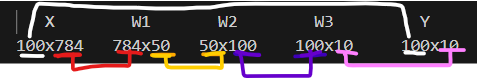
>다차원 배열의 대응하는 차원의 원소수가 일치하고 있음

In [203]:
x,_=get_data()
network=init_network()
W1,W2,W3=network['W1'],network['W2'],network['W3']
x.shape #(10000,784)

# 각 층의 가중치 형상 - 다차원 배열의 대응하는 차원의 원소수가 일치하고 있음
W1.shape #(784, 50)
W2.shape # (50,100)

# 최종 결과는 원소가 10개인 1차원 배열 y가 출력
W3.shape #(100,10)



(100, 10)

In [204]:
# 입력 100 x 784
# 출력 100 x 10
# > 100장 분량 입력데이터의 결과가 한번에 출력


# 배치 처리 구현


In [205]:
x,_=get_data()
network=init_network()

batch_size=100 # 배치크기 > 100장씩 묶어서 꺼냄
accuracy_cnt=0

for i in range(0,len(x),batch_size):
    x_batch= x[i:i+batch_size]

# x_batch를 신경망에 통과시켜 각 클래스에 대한 확률 값을 반환    

    y_batch=predict(network,x_batch)
# argmax: 최댓값의 인덱스를 가져옴=>예측된 클래스 확률 중에서 가장 높은 값을 가지는 인덱스를 선택한다는 의미
# 예를 들어, 이미지가 숫자 '3'일 확률이 가장 높다고 예측된 경우, 이 인덱스는 3이 됌

    p=np.argmax(y_batch,axis=1)
    accuracy_cnt+=np.sum(p==t[i:i+batch_size])
print("ACCURACY:"+str(float(accuracy_cnt/len(x))))

ACCURACY:0.9352


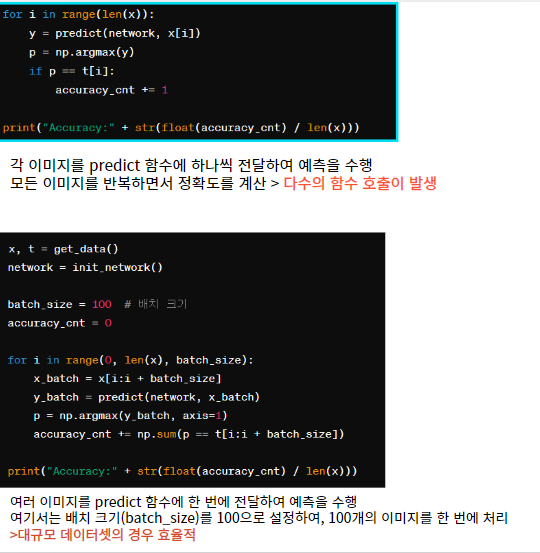